In [34]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
#sysはコマンドライン引数
import sys
import csv
np.seterr(divide='ignore', invalid='ignore')
#csvファイルの読み込み
df = pd.read_csv("../../dataset/ransuu.csv",header=None)
#df = iris.drop('species', axis=1)
#dfをnumpyで扱えるnp.ndarray変換
X = df.values
#配列の行数、列数の格納
X_size,dimension = X.shape
#クラスタ数宣言
c = 5
#Kはクラスタサイズ 
K = X_size /c
max_iter = 100
distances=np.zeros((X_size,c))
best_J = 10000

In [37]:
d=[]
centroids = X[np.random.choice(X_size,c)]
for i in range(X_size):
    for j in range(c):
        d.append(np.sum((X[i]-centroids[j])**2))
#uの更新

In [40]:
X.shape

(100, 2)

In [42]:
len(d)

500

In [62]:
#uの最適化部分関数作成

#変数定義
u_list = [0] * len(d)
for i in range(len(d)):
    u_list[i] = cp.Variable()

#目的関数定義
Objective_function = 0 
for i  in range(len(d)):
    Objective_function += d[i]*cp.power(u_list[i],8)
objective = cp.Minimize(Objective_function)
# 制約条件の定義
zeroijou = []
goukeiiti = []
goukeigo = []
constraints = []
#0以上
for i in range (len(d)):
    zeroijou.append(u_list[i]>=0)
#合計1
for i in range (0,len(d),c):
    iti = 0
    for j in range(c):    
        iti += u_list[i+j]
    goukeiiti.append(iti==1)

#合計がクラスタサイズ
#下の式はcの値によって逐次変更しないといけない
goukeigo.append(sum(u_list[0:len(d):c])==K)
goukeigo.append(sum(u_list[1:len(d):c])==K)
goukeigo.append(sum(u_list[2:len(d):c])==K)
goukeigo.append(sum(u_list[3:len(d):c])==K)
goukeigo.append(sum(u_list[4:len(d):c])==K)
constraints.extend(zeroijou)
constraints.extend(goukeiiti)
constraints.extend(goukeigo)

# 問題を定義
problem = cp.Problem(objective, constraints)
# 最適化 (戻り値は最適化後に得られた値=最小値)
# 結果表示
problem.solve(verbose=True)
print("obj: ", problem.value)
#print("u_list: ")
#print(u_list)
#print(u_list.value)
#result = problem.solve()

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Jun 08 07:45:44 PM: Your problem has 500 variables, 605 constraints, and 0 parameters.
(CVXPY) Jun 08 07:45:44 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 08 07:45:44 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 08 07:45:44 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 08 07:45:44 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jun 08 07:45:44 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing

In [60]:
Objective_function = 0
u_list = [0] * len(d)
for i  in range(len(d)):
    Objective_function += d[i]*cp.power(u_list[i],3)
objective = cp.Minimize(Objective_function)

In [51]:
(cp.power(u_list[0],3))

Expression(CONSTANT, NONNEGATIVE, ())

In [49]:
objective

Minimize(Expression(CONSTANT, NONNEGATIVE, ()))

In [59]:
**3

0

In [29]:
import cvxpy as cvx
# 行列用意
n = 2 
A = np.random.randn(n, n)
A = A + A.T
X = cvx.Variable((n,n), symmetric=True)
# 問題定義
constraints = [X >> 0] # 半正定値制約
obj = cvx.Minimize(cvx.norm(A-X, "fro")**2)
prob = cvx.Problem(obj, constraints)
prob.solve(verbose=True)
# 結果表示
print("obj: ", prob.value)
print("X: ")
print(X.value)

                                     CVXPY                                     
                                     v1.2.0                                    
(CVXPY) Jun 08 06:30:46 PM: Your problem has 4 variables, 1 constraints, and 0 parameters.
(CVXPY) Jun 08 06:30:46 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 08 06:30:46 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jun 08 06:30:46 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 08 06:30:46 PM: Compiling problem (target solver=SCS).
(CVXPY) Jun 08 06:30:46 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> S

In [30]:
X

Variable((2, 2), symmetric=True)

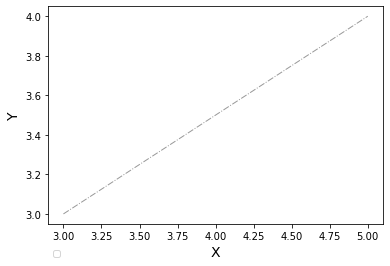

In [64]:
#グラフ
colors = ['red', 'blue', 'green','yellow','fuchsia']
markers = [",", "o", "v", "^", "<", ">", "1", "2", "3"]
fig = plt.figure()
ax = fig.add_subplot(111)
#clusterはnp.array型じゃないとダメそう(リスト型だとグラフに描画されなかった)
ax.set_xlabel("X", size=14)
ax.set_ylabel("Y", size=14)
ax.legend(['cluster1', 'cluster2','cluster3',"center"],fontsize=9,ncol=2,bbox_to_anchor=(0, -0.1), loc='upper left')  # 凡例を表示

ax.plot([3,5],[3,4],color="black",linestyle="dashdot",linewidth = 1, alpha = 0.4)
#ax.quiver(X[i][0], X[i][1], epsilon[i][0], epsilon[i][1], angles='xy', scale_units='xy', scale=1,width=0.003,alpha=0.5) # 矢印プロット
#______
plt.show()